### Cubic splines 

Creating cubic splines for different values of N for a given function:

$$f(x) = (1 + x^2)^{-1}$$

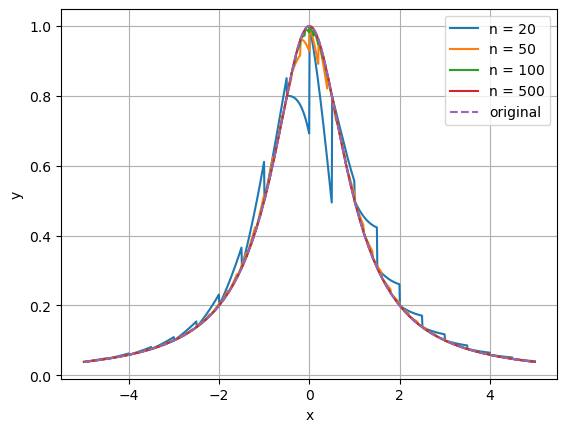

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def main_func(x):
    return(1 + x**2)**(-1)

def create_h(n, x):
    h = []
    for j in range(1, n+1):
        l = x[j] - x[j-1]
        h.append(l)
    return(h)


def create_A(x, h, n):

    A = [[0] * (n-1) for _ in range(n-1)]
    for i in range(n-1):
        if i > 0:
            A[i][i-1] = h[i-1] 
        A[i][i] = 2 * (h[i-1] + h[i]) 
        if i < n-2:
            A[i][i+1] = h[i]  
    return(A)
                
def create_b(y, h, n):
    b = np.zeros(n-1)
    for j in range(1, n):
        b[j-1] = 3 * (((y[j+1] - y[j])/h[j]) - ((y[j] - y[j-1])/h[j-1]))
    return(b)

def alphas_solve(A, b):
    return(np.linalg.solve(A, b))


def coeff(alpha, y, h, n):
    a1, b1, c1, d1 = [], [], [], []
    for j in range(1, n+1):
        a1.append(y[j-1])
        b1.append(((y[j]-y[j-1])/h[j-1])+((h[j-1]/3)*((2*alpha[j] + alpha[j-1]))))
        c1.append(alpha[j-1])
        d1.append((alpha[j] - alpha[j-1]) / (3*h[j-1]))
    return(a1, b1, c1, d1)


def spline(x, x_val, a1, b1, c1, d1):
    for j in range(1, len(x_val)):
        if x_val[j-1] <= x <= x_val[j]:
            return(a1[j-1] + (b1[j-1]*(x - x_val[j-1]))+ (c1[j-1]*((x - x_val[j-1])**2)) + (d1[j-1]*((x - x_val[j-1])**3)))
    return None

nl = [20, 50, 100, 500]
x_all = np.linspace(-5, 5, 1000)

for n in nl:
    x_val = np.linspace(-5, 5, n+1)
    h = create_h(n, x_val)
    A = create_A(x_val, h, n)
    y = [main_func(i) for i in x_val]
    b_vector = create_b(y, h, n)

    alpha = np.zeros(n+1)
    alpha[1:n] = alphas_solve(A, b_vector)
    a1, b1, c1, d1 = coeff(alpha, y, h, n)

    spline_vals = []
    for x in x_all:
        spline_vals.append(spline(x, x_val, a1, b1, c1, d1))

    plt.plot(x_all, spline_vals, label = f'n = {n}')

plt.plot(x_all, main_func(x_all), '--', label="original")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Observation: The larher the value of N, the more accurate the cubic polynomial is to the actual function.